##Import Packages

In [1]:
pip install pmdarima

In [2]:
pip install scikit-learn

In [3]:
import os
import numpy as np
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import plotly.express as px
import seaborn as sns
import time

# Import Data

In [4]:
df = pd.read_csv('/content/Unemployment_Rates_around_the_World_1991-2021.csv')
df

,Country Name,Continent,Country Code,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,Asia,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,Albania,Europe,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
2,Algeria,Africa,DZA,20.60,24.38,26.23,27.74,31.84,28.53,25.43,...,10.97,9.82,10.21,11.21,10.20,10.33,10.42,10.51,12.55,12.70
3,Andorra,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,Africa,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,South America,VEN,9.45,7.69,6.60,8.56,10.24,11.77,11.16,...,6.60,7.54,6.86,6.08,5.32,5.05,5.02,5.10,6.63,6.41
191,Vietnam,Asia,VNM,2.09,1.91,1.97,1.93,1.90,1.93,2.87,...,1.03,1.32,1.26,1.85,1.85,1.87,1.16,2.04,2.39,2.17
192,Yemen,Asia,YEM,8.32,8.31,8.35,8.34,8.96,9.59,10.20,...,13.17,13.27,13.47,13.77,13.43,13.30,13.15,13.06,13.39,13.57
193,Zambia,Africa,ZMB,18.90,19.37,19.70,18.43,16.81,15.30,13.64,...,7.85,8.61,9.36,10.13,10.87,11.63,12.01,12.52,12.85,13.03


#Understand the data

In [5]:
df.head()

,Country Name,Continent,Country Code,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,Asia,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,Albania,Europe,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
2,Algeria,Africa,DZA,20.60,24.38,26.23,27.74,31.84,28.53,25.43,...,10.97,9.82,10.21,11.21,10.20,10.33,10.42,10.51,12.55,12.70
3,Andorra,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,Africa,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53


In [6]:
df.tail()

,Country Name,Continent,Country Code,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
190,Venezuela,South America,VEN,9.45,7.69,6.60,8.56,10.24,11.77,11.16,...,6.60,7.54,6.86,6.08,5.32,5.05,5.02,5.10,6.63,6.41
191,Vietnam,Asia,VNM,2.09,1.91,1.97,1.93,1.90,1.93,2.87,...,1.03,1.32,1.26,1.85,1.85,1.87,1.16,2.04,2.39,2.17
192,Yemen,Asia,YEM,8.32,8.31,8.35,8.34,8.96,9.59,10.20,...,13.17,13.27,13.47,13.77,13.43,13.30,13.15,13.06,13.39,13.57
193,Zambia,Africa,ZMB,18.90,19.37,19.70,18.43,16.81,15.30,13.64,...,7.85,8.61,9.36,10.13,10.87,11.63,12.01,12.52,12.85,13.03
194,Zimbabwe,Africa,ZWE,4.94,4.99,4.97,4.96,5.63,6.25,6.93,...,5.15,4.98,4.77,4.78,4.79,4.78,4.80,4.83,5.35,5.17


In [7]:
df.describe()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,177.000000,177.000000,177.000000,177.000000,177.000000,176.000000,177.000000,177.000000,177.000000,177.000000,...,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,7.405367,7.800960,8.285593,8.461695,8.522825,8.717557,8.607401,8.643277,8.738588,8.607345,...,8.249040,8.274972,8.114859,7.980734,7.836893,7.553220,7.308757,7.138023,8.331356,8.309492
std,6.571592,6.884888,6.909956,6.829714,6.958440,7.020162,6.821381,6.758609,6.713238,6.753867,...,6.346962,6.396145,6.242123,6.081994,5.939293,5.751563,5.649934,5.540948,5.945009,5.992238
min,0.300000,0.340000,0.410000,0.470000,0.500000,0.560000,0.540000,0.560000,0.570000,0.580000,...,0.480000,0.250000,0.200000,0.170000,0.150000,0.140000,0.110000,0.100000,0.210000,0.260000
25%,2.540000,2.760000,3.120000,3.480000,3.400000,3.555000,3.560000,3.740000,3.790000,3.700000,...,3.750000,3.700000,3.700000,3.790000,3.860000,3.690000,3.640000,3.510000,4.280000,4.330000
50%,5.410000,5.690000,6.030000,6.410000,6.990000,7.150000,7.070000,7.100000,6.870000,6.500000,...,6.660000,6.350000,6.380000,6.150000,5.950000,5.650000,5.370000,5.210000,6.690000,6.420000
75%,10.100000,10.670000,10.920000,11.090000,11.040000,11.732500,11.440000,12.000000,12.060000,11.780000,...,10.970000,10.330000,10.590000,10.130000,10.050000,9.500000,9.220000,9.280000,11.080000,10.660000
max,36.120000,36.390000,36.740000,36.980000,37.340000,38.800000,37.940000,37.160000,36.350000,35.460000,...,31.020000,29.000000,28.030000,27.690000,26.540000,27.040000,26.910000,28.470000,29.220000,33.560000


In [8]:
df.shape

(195, 34)

In [9]:
df.dtypes

Country Name     object
Continent        object
Country Code     object
1991            float64
1992            float64
1993            float64
1994            float64
1995            float64
1996            float64
1997            float64
1998            float64
1999            float64
2000            float64
2001            float64
2002            float64
2003            float64
2004            float64
2005            float64
2006            float64
2007            float64
2008            float64
2009            float64
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object

In [10]:
df.nunique()

Country Name    195
Continent         7
Country Code    177
1991            167
1992            164
1993            165
1994            166
1995            166
1996            166
1997            168
1998            168
1999            170
2000            172
2001            168
2002            169
2003            171
2004            166
2005            173
2006            170
2007            171
2008            164
2009            166
2010            169
2011            171
2012            165
2013            167
2014            168
2015            168
2016            169
2017            163
2018            169
2019            163
2020            171
2021            168
dtype: int64

In [11]:
df.isnull().any(axis=0)

Country Name    False
Continent       False
Country Code     True
1991             True
1992             True
1993             True
1994             True
1995             True
1996             True
1997             True
1998             True
1999             True
2000             True
2001             True
2002             True
2003             True
2004             True
2005             True
2006             True
2007             True
2008             True
2009             True
2010             True
2011             True
2012             True
2013             True
2014             True
2015             True
2016             True
2017             True
2018             True
2019             True
2020             True
2021             True
dtype: bool

In [12]:
df.isnull().any(axis=1)

0      False
1      False
2      False
3       True
4      False
       ...  
190    False
191    False
192    False
193    False
194    False
Length: 195, dtype: bool

In [13]:
df_notnull = df.dropna()
df_notnull

,Country Name,Continent,Country Code,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,Asia,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,Albania,Europe,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
2,Algeria,Africa,DZA,20.60,24.38,26.23,27.74,31.84,28.53,25.43,...,10.97,9.82,10.21,11.21,10.20,10.33,10.42,10.51,12.55,12.70
4,Angola,Africa,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
6,Argentina,South America,ARG,5.44,6.36,10.10,11.76,18.80,17.11,14.82,...,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,South America,VEN,9.45,7.69,6.60,8.56,10.24,11.77,11.16,...,6.60,7.54,6.86,6.08,5.32,5.05,5.02,5.10,6.63,6.41
191,Vietnam,Asia,VNM,2.09,1.91,1.97,1.93,1.90,1.93,2.87,...,1.03,1.32,1.26,1.85,1.85,1.87,1.16,2.04,2.39,2.17
192,Yemen,Asia,YEM,8.32,8.31,8.35,8.34,8.96,9.59,10.20,...,13.17,13.27,13.47,13.77,13.43,13.30,13.15,13.06,13.39,13.57
193,Zambia,Africa,ZMB,18.90,19.37,19.70,18.43,16.81,15.30,13.64,...,7.85,8.61,9.36,10.13,10.87,11.63,12.01,12.52,12.85,13.03


In [14]:
df_notnull.dtypes

Country Name     object
Continent        object
Country Code     object
1991            float64
1992            float64
1993            float64
1994            float64
1995            float64
1996            float64
1997            float64
1998            float64
1999            float64
2000            float64
2001            float64
2002            float64
2003            float64
2004            float64
2005            float64
2006            float64
2007            float64
2008            float64
2009            float64
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object

# Data Visualization

## Unemployment Rates Interactive Map (Before Prediction)

In [15]:
fig = px.choropleth(df_notnull.melt(id_vars=['Country Name', 'Continent', 'Country Code'],
                              var_name='Year',
                              value_name='Unemployment Rate'),
                    locations="Country Code",
                    color="Unemployment Rate",
                    hover_name="Country Name",
                    animation_frame="Year",
                    range_color=(0, 40),
                    color_continuous_scale=px.colors.sequential.PuBuGn,
                    title='Unemployment Rates Interactive Map')

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))  # Optional: Hide frame and coastlines

fig.show()

In [16]:
data_2021 = df_notnull[['Country Name', '2021']]
data_2021

,Country Name,2021
0,Afghanistan,13.28
1,Albania,11.82
2,Algeria,12.70
4,Angola,8.53
6,Argentina,10.90
...,...,...
190,Venezuela,6.41
191,Vietnam,2.17
192,Yemen,13.57
193,Zambia,13.03


In [17]:
data_2021_sorted = data_2021.sort_values(by='Country Name')
data_2021_sorted

,Country Name,2021
0,Afghanistan,13.28
1,Albania,11.82
2,Algeria,12.70
4,Angola,8.53
6,Argentina,10.90
...,...,...
190,Venezuela,6.41
191,Vietnam,2.17
192,Yemen,13.57
193,Zambia,13.03


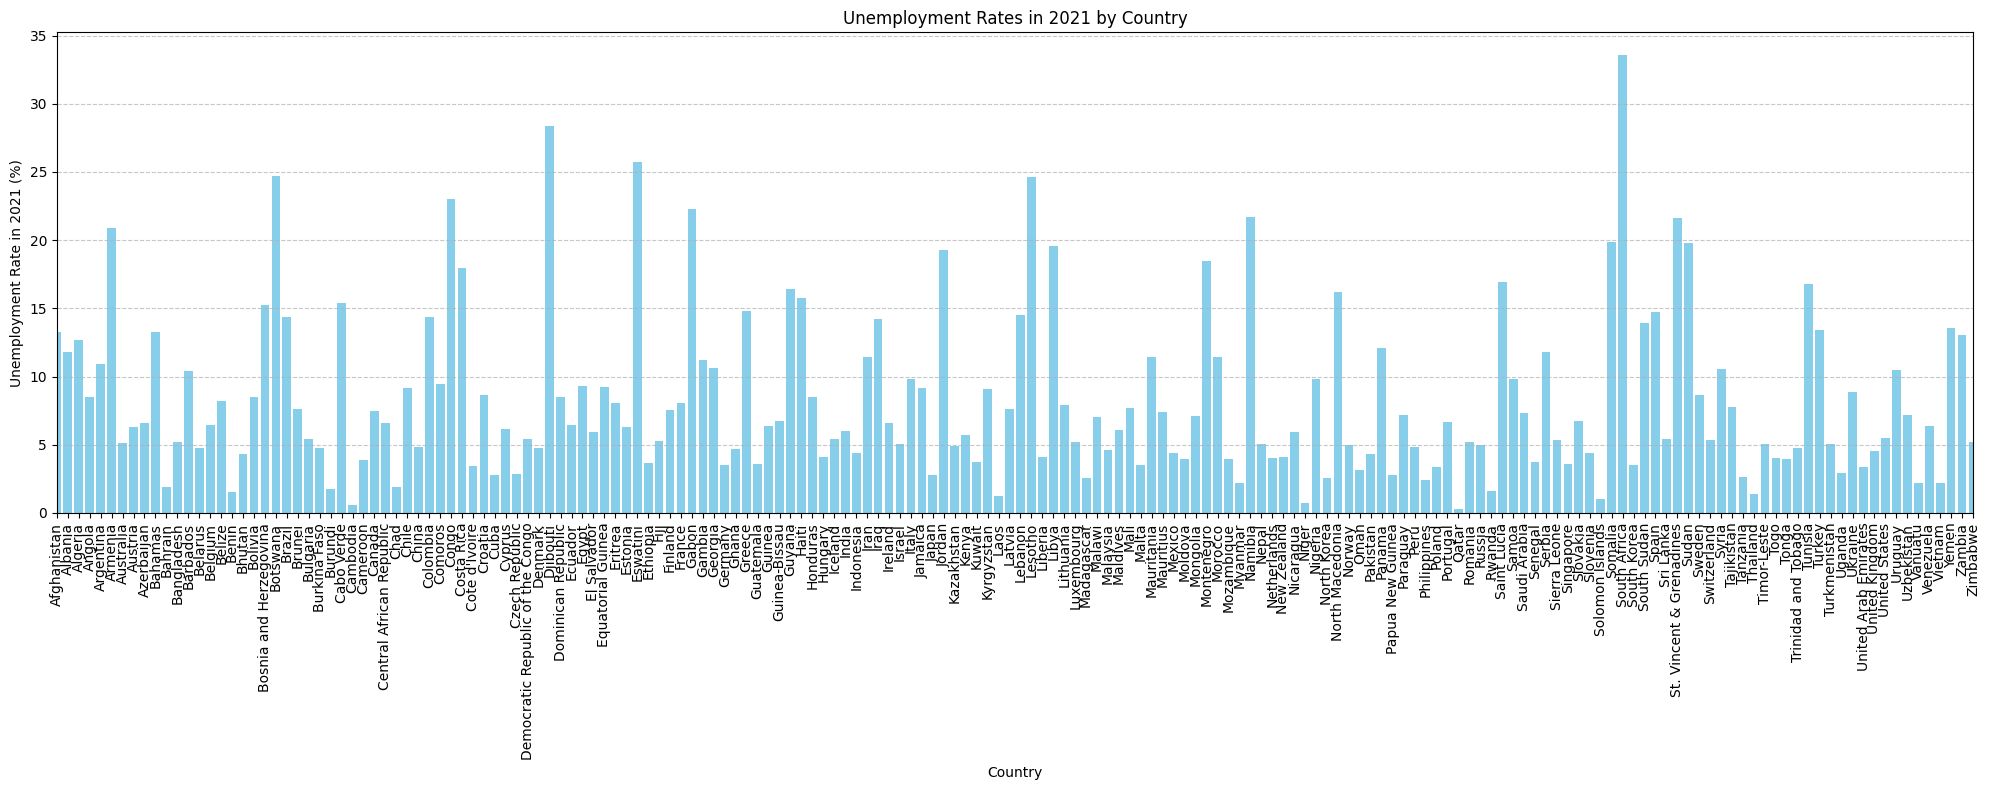

In [18]:
plt.figure(figsize=(20, 8))
plt.xlim(5, len(data_2021_sorted) - 2)
plt.bar(np.arange(len(data_2021_sorted['Country Name'])), data_2021_sorted['2021'], width=0.8, color='skyblue')
plt.xlabel('Country')
plt.ylabel('Unemployment Rate in 2021 (%)')
plt.title('Unemployment Rates in 2021 by Country')
plt.xticks(ticks=np.arange(len(data_2021_sorted['Country Name'])), labels=data_2021_sorted['Country Name'], rotation=90)
plt.subplots_adjust(left=0.005, right=0.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Unemployment Rates Plot by Higest Rates in each Alphabeical

In [19]:
data_2021 = df_notnull[['Country Name', '2021']]

# Group the data by the first letter of the country name
grouped_data = data_2021.groupby(data_2021['Country Name'].str[0])

# Get the index of the maximum value for each group
max_index = grouped_data['2021'].idxmax()

# Use the indices to extract the corresponding rows
countries_with_highest_unemployment = data_2021.loc[max_index]

# Display the result
countries_with_highest_unemployment

,Country Name,2021
7,Armenia,20.90
22,Botswana,24.72
38,Congo,23.01
47,Djibouti,28.39
56,Eswatini,25.76
60,France,8.06
61,Gabon,22.26
72,Haiti,15.73
80,Iraq,14.19
86,Jordan,19.25


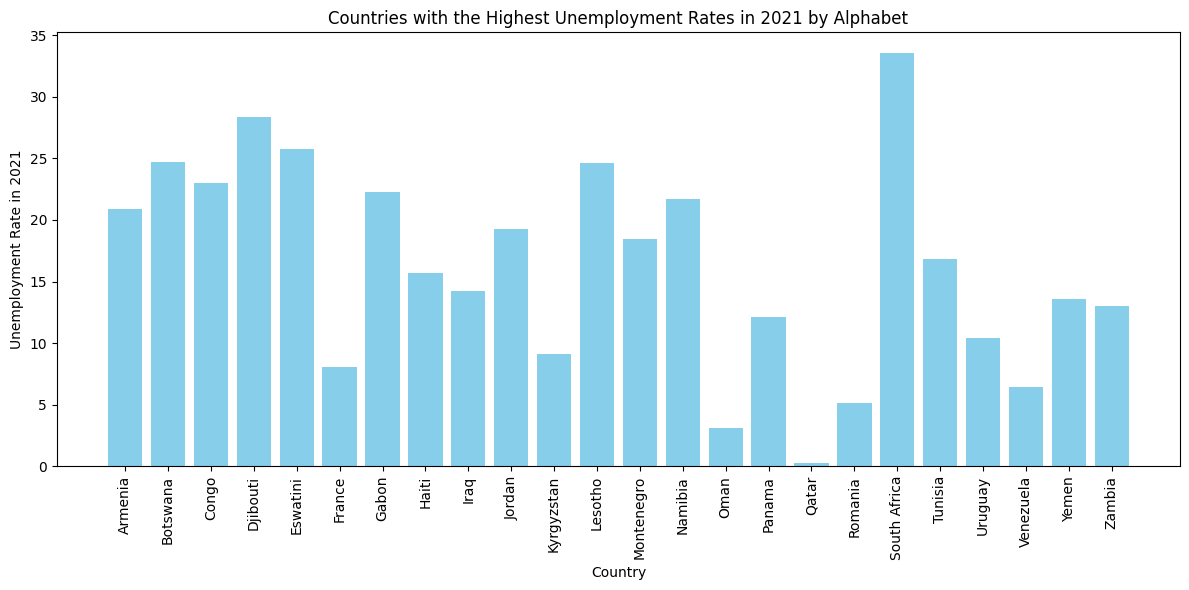

In [20]:
# Plot the graph
plt.figure(figsize=(12, 6))
plt.bar(countries_with_highest_unemployment['Country Name'], countries_with_highest_unemployment['2021'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Unemployment Rate in 2021')
plt.title('Countries with the Highest Unemployment Rates in 2021 by Alphabet')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Unemployment Rates Plot by Continents


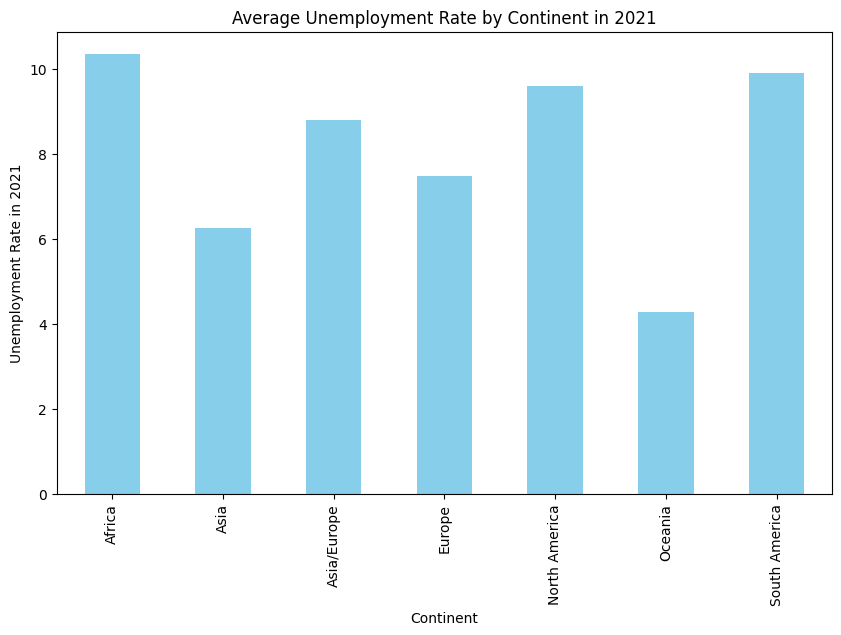

In [21]:
# Select only the relevant columns (Country, Continent, 2021)
df_2021 = df_notnull[['Country Name', 'Continent', '2021']]

# Group by continent and calculate the average unemployment rate for 2021
continent_avg_2021 = df_2021.groupby('Continent')['2021'].mean()

# Plotting
plt.figure(figsize=(10, 6))
continent_avg_2021.plot(kind='bar', color='skyblue')

# Set labels and title
plt.xlabel('Continent')
plt.ylabel('Unemployment Rate in 2021')
plt.title('Average Unemployment Rate by Continent in 2021')

# Show the plot
plt.show()

# Predict and Calculate MAD, MSE, RMSE, MAPE

In [22]:
predict_df=df_notnull.copy()
predict_df

,Country Name,Continent,Country Code,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,Asia,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,Albania,Europe,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
2,Algeria,Africa,DZA,20.60,24.38,26.23,27.74,31.84,28.53,25.43,...,10.97,9.82,10.21,11.21,10.20,10.33,10.42,10.51,12.55,12.70
4,Angola,Africa,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
6,Argentina,South America,ARG,5.44,6.36,10.10,11.76,18.80,17.11,14.82,...,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,South America,VEN,9.45,7.69,6.60,8.56,10.24,11.77,11.16,...,6.60,7.54,6.86,6.08,5.32,5.05,5.02,5.10,6.63,6.41
191,Vietnam,Asia,VNM,2.09,1.91,1.97,1.93,1.90,1.93,2.87,...,1.03,1.32,1.26,1.85,1.85,1.87,1.16,2.04,2.39,2.17
192,Yemen,Asia,YEM,8.32,8.31,8.35,8.34,8.96,9.59,10.20,...,13.17,13.27,13.47,13.77,13.43,13.30,13.15,13.06,13.39,13.57
193,Zambia,Africa,ZMB,18.90,19.37,19.70,18.43,16.81,15.30,13.64,...,7.85,8.61,9.36,10.13,10.87,11.63,12.01,12.52,12.85,13.03


In [25]:
min_mad, max_mad = float('inf'), float('-inf')
min_mse, max_mse = float('inf'), float('-inf')
min_rmse, max_rmse = float('inf'), float('-inf')
min_mape, max_mape = float('inf'), float('-inf')

min_mad_countries, max_mad_countries = [], []
min_mse_countries, max_mse_countries = [], []
min_rmse_countries, max_rmse_countries = [], []
min_mape_countries, max_mape_countries = [], []

warnings.filterwarnings("ignore")

predict_df["2022"] = None
predict_df["2023"] = None
predict_df["2024"] = None
predict_df["2025"] = None
predict_df["2026"] = None

start_time = time.time()
for index, row in predict_df.iterrows():
    # Measure computation time per iteration
    iteration_start_time = time.time()

    time_series_data_A = row.loc["1991":"2026"].dropna().astype(float)
    time_series_data_B = row.loc["1991":"2021"].dropna().astype(float)

    time_series_data_A.index.freq = "A"
    time_series_data_B.index.freq = "A"

    try:
        train_size = int(len(time_series_data_B) * 0.8)
        train_data, test_data = time_series_data_B[:train_size], time_series_data_B[train_size:]
        auto_model = auto_arima(train_data, seasonal=False, suppress_warnings=True)
        order = auto_model.get_params()["order"]
        model = ARIMA(train_data, order=order)
        fit_model = model.fit()
        prediction = fit_model.predict(start="2022", end="2026")
        test_data = test_data[:len(prediction)]
        predict_df.loc[index, "2022":"2026"] = prediction.values

        country = row["Country Name"]
        for date, value in prediction.iteritems():
            date_str = date.strftime("%Y")
            value = round(value, 5)
            print(f"{country} ({date_str}) {value}")

        prev_value = None
        total_deviation = 0
        for date, value in prediction.iteritems():
            deviation = (value - prev_value) if prev_value is not None else 0
            total_deviation += deviation
            prev_value = value
        print(f"deviation: {total_deviation:.5f}")

        mad = np.median(np.abs(test_data - np.mean(test_data)))
        mse = mean_squared_error(test_data, prediction)
        rmse = np.sqrt(mse)
        mape = mean_absolute_percentage_error(test_data, prediction)
        print(f"MAD: {mad:.5f}, MSE: {mse:.5f}, RMSE: {rmse:.5f}, MAPE: {mape:.5f}")

        if mad < min_mad:
            min_mad = mad
            min_mad_countries = [country]
        elif mad == min_mad:
            min_mad_countries.append(country)
        if mad > max_mad:
            max_mad = mad
            max_mad_countries = [country]
        elif mad == max_mad:
            max_mad_countries.append(country)

        if mse < min_mse:
            min_mse = mse
            min_mse_countries = [country]
        elif mse == min_mse:
            min_mse_countries.append(country)
        if mse > max_mse:
            max_mse = mse
            max_mse_countries = [country]
        elif mse == max_mse:
            max_mse_countries.append(country)

        if rmse < min_rmse:
            min_rmse = rmse
            min_rmse_countries = [country]
        elif rmse == min_rmse:
            min_rmse_countries.append(country)
        if rmse > max_rmse:
            max_rmse = rmse
            max_rmse_countries = [country]
        elif rmse == max_rmse:
            max_rmse_countries.append(country)

        if mape < min_mape:
            min_mape = mape
            min_mape_countries = [country]
        elif mape == min_mape:
            min_mape_countries.append(country)
        if mape > max_mape:
            max_mape = mape
            max_mape_countries = [country]
        elif mape == max_mape:
            max_mape_countries.append(country)

        iteration_time = time.time() - iteration_start_time
        print(f"computation time for iteration {index}: {iteration_time:.5f} seconds")

        print("----------------------------------------------------------------------------------------------------")
    except Exception as e:
        print(f"row {index} - an error occurred: {e}")
total_time = time.time() - start_time

Afghanistan (2022) 11.18122
Afghanistan (2023) 11.18153
Afghanistan (2024) 11.17566
Afghanistan (2025) 11.18271
Afghanistan (2026) 11.17756
deviation: -0.00366
MAD: 0.01800, MSE: 0.00120, RMSE: 0.03458, MAPE: 0.00273
computation time for iteration 0: 1.53196 seconds
----------------------------------------------------------------------------------------------------
Albania (2022) 16.9134
Albania (2023) 16.9134
Albania (2024) 16.9134
Albania (2025) 16.9134
Albania (2026) 16.9134
deviation: 0.00000
MAD: 1.70000, MSE: 12.81346, RMSE: 3.57959, MAPE: 0.24088
computation time for iteration 1: 0.77691 seconds
----------------------------------------------------------------------------------------------------
Algeria (2022) 10.21
Algeria (2023) 10.21
Algeria (2024) 10.21
Algeria (2025) 10.21
Algeria (2026) 10.21
deviation: 0.00000
MAD: 0.20400, MSE: 0.22972, RMSE: 0.47929, MAPE: 0.03010
computation time for iteration 2: 0.29130 seconds
----------------------------------------------------------

In [26]:
print(f"total computation time: {total_time:.5f} seconds")
print("----------------------------------------------------------------------------------------------------")
print("Mean Absolute Deviation")
print(f"minimum: {min_mad:.5f}")
print(f"country: {', '.join(min_mad_countries)}")
print(f"maximum: {max_mad:.5f}")
print(f"country: {', '.join(max_mad_countries)}")
print("----------------------------------------------------------------------------------------------------")
print("Mean Squared Error")
print(f"minimum: {min_mse:.5f}")
print(f"country: {', '.join(min_mse_countries)}")
print(f"maximum: {max_mse:.5f}")
print(f"country: {', '.join(max_mse_countries)}")
print("----------------------------------------------------------------------------------------------------")
print("Root Mean Square Error")
print(f"minimum: {min_rmse:.5f}")
print(f"country: {', '.join(min_rmse_countries)}")
print(f"maximum: {max_rmse:.5f}")
print(f"country: {', '.join(max_rmse_countries)}")
print("----------------------------------------------------------------------------------------------------")
print("Mean Absolute Percentage Error")
print(f"minimum: {min_mape:.5f}")
print(f"country: {', '.join(min_mape_countries)}")
print(f"maximum: {max_mape:.5f}")
print(f"country: {', '.join(max_mape_countries)}")

total computation time: 211.31826 seconds
----------------------------------------------------------------------------------------------------
Mean Absolute Deviation
minimum: 0.00000
country: Uganda
maximum: 3.86600
country: Bosnia and Herzegovina
----------------------------------------------------------------------------------------------------
Mean Squared Error
minimum: 0.00012
country: Bahrain
maximum: 107.78655
country: North Macedonia
----------------------------------------------------------------------------------------------------
Root Mean Square Error
minimum: 0.01074
country: Bahrain
maximum: 10.38203
country: North Macedonia
----------------------------------------------------------------------------------------------------
Mean Absolute Percentage Error
minimum: 0.00217
country: Gabon
maximum: 3.31845
country: Cambodia


## Unemployment Rates Interactive Map (After Prediction)

In [27]:
predict_df.dtypes

Country Name     object
Continent        object
Country Code     object
1991            float64
1992            float64
1993            float64
1994            float64
1995            float64
1996            float64
1997            float64
1998            float64
1999            float64
2000            float64
2001            float64
2002            float64
2003            float64
2004            float64
2005            float64
2006            float64
2007            float64
2008            float64
2009            float64
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
2022             object
2023             object
2024             object
2025             object
2026             object
dtype: object

In [28]:
columns_to_convert = ['2022', '2023', '2024', '2025', '2026']

# Convert selected columns to float64
predict_df[columns_to_convert] = predict_df[columns_to_convert].astype('float64')

In [29]:
predict_df.dtypes

Country Name     object
Continent        object
Country Code     object
1991            float64
1992            float64
1993            float64
1994            float64
1995            float64
1996            float64
1997            float64
1998            float64
1999            float64
2000            float64
2001            float64
2002            float64
2003            float64
2004            float64
2005            float64
2006            float64
2007            float64
2008            float64
2009            float64
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
2022            float64
2023            float64
2024            float64
2025            float64
2026            float64
dtype: object

In [30]:
fig = px.choropleth(predict_df.melt(id_vars=['Country Name', 'Continent', 'Country Code'],
                                  var_name='Year',
                                  value_name='Unemployment Rate'),
                    locations="Country Code",
                    color="Unemployment Rate",
                    hover_name="Country Name",
                    animation_frame="Year",
                    range_color=(0, 40),
                    color_continuous_scale=px.colors.sequential.matter,
                    title='Unemployment Rates Interactive Map')

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))  # Optional: Hide frame and coastlines

fig.show()

In [31]:
predict_df.head()

,Country Name,Continent,Country Code,1991,1992,1993,1994,1995,1996,1997,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026
0,Afghanistan,Asia,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,...,11.18,11.15,11.22,11.71,13.28,11.181222,11.181531,11.175665,11.182708,11.177558
1,Albania,Europe,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,...,13.62,12.30,11.47,13.33,11.82,16.913399,16.913399,16.913399,16.913399,16.913399
2,Algeria,Africa,DZA,20.60,24.38,26.23,27.74,31.84,28.53,25.43,...,10.33,10.42,10.51,12.55,12.70,10.210000,10.210000,10.210000,10.210000,10.210000
4,Angola,Africa,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,...,7.41,7.42,7.42,8.33,8.53,7.370000,7.370000,7.370000,7.370000,7.370000
6,Argentina,South America,ARG,5.44,6.36,10.10,11.76,18.80,17.11,14.82,...,8.35,9.22,9.84,11.46,10.90,10.506162,10.544760,10.565511,10.576123,10.581209


In [32]:
predict_df.tail()

,Country Name,Continent,Country Code,1991,1992,1993,1994,1995,1996,1997,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026
190,Venezuela,South America,VEN,9.45,7.69,6.60,8.56,10.24,11.77,11.16,...,5.05,5.02,5.10,6.63,6.41,9.253412,9.340825,9.404847,9.451737,9.486080
191,Vietnam,Asia,VNM,2.09,1.91,1.97,1.93,1.90,1.93,2.87,...,1.87,1.16,2.04,2.39,2.17,1.260000,1.260000,1.260000,1.260000,1.260000
192,Yemen,Asia,YEM,8.32,8.31,8.35,8.34,8.96,9.59,10.20,...,13.30,13.15,13.06,13.39,13.57,14.002036,14.016425,14.027165,14.035181,14.041166
193,Zambia,Africa,ZMB,18.90,19.37,19.70,18.43,16.81,15.30,13.64,...,11.63,12.01,12.52,12.85,13.03,9.327698,9.327698,9.327698,9.327698,9.327698
194,Zimbabwe,Africa,ZWE,4.94,4.99,4.97,4.96,5.63,6.25,6.93,...,4.78,4.80,4.83,5.35,5.17,5.190721,5.191055,5.191169,5.191209,5.191222


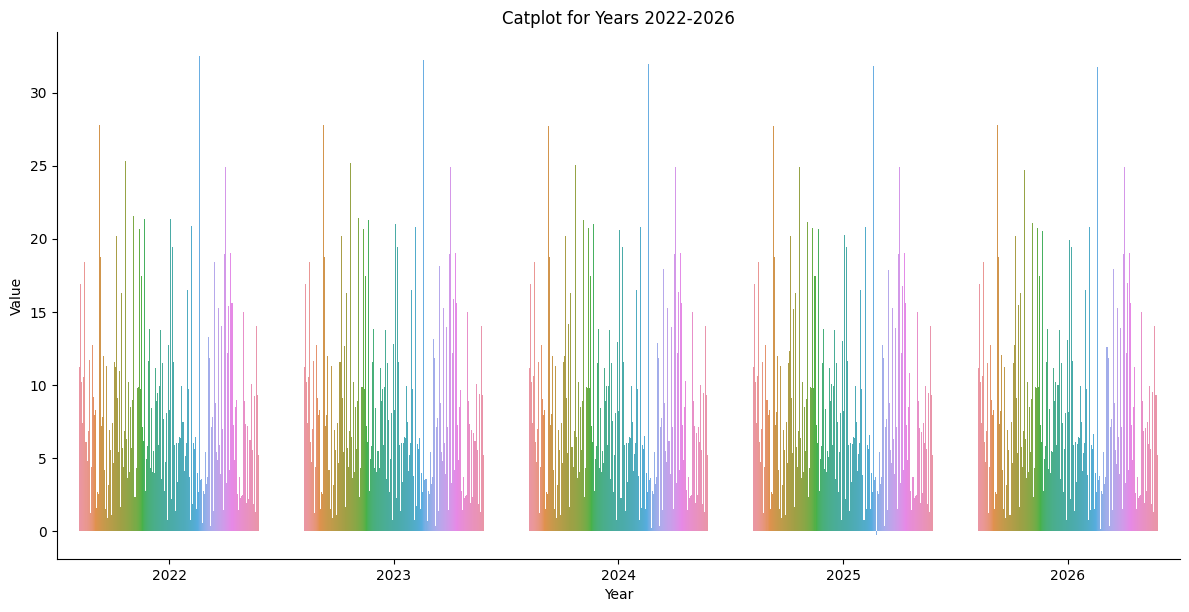

In [33]:
years_2022_2026 = predict_df[['Country Name', 'Continent', '2022', '2023', '2024', '2025', '2026']]

# Reshape the data for seaborn catplot
melted_data = pd.melt(years_2022_2026, id_vars=['Country Name', 'Continent'], var_name='Year', value_name='Value')

# Create a catplot without legend
sns.catplot(x='Year', y='Value', hue='Country Name', data=melted_data, kind='bar', height=6, aspect=2, legend=False)

# Customize the plot
plt.title('Catplot for Years 2022-2026')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()